# **Seminar 2 - Natural Language Processing**
*Naumov Anton (Any0019)*

*To contact me in telegram: @any0019*

## 1. Понимание рекуррентных архитектур

### 1.1 Recurrent Neural Network (RNN)

<img src=https://avatars.mds.yandex.net/get-zen_doc/3431006/pub_5ed693e6eef56d43885b5c36_5ed693feaea73f25554811d9/orig alt="RNN" width="50%"/>

$$ H^{(t)} = \tanh \Big( W^{h x} \cdot X^{(t)} + W^{h h} \cdot H^{(t-1)} + b_{h} \Big) $$
$$ Y^{(t)} = W^{y h} \cdot H^{(t)} + b_{y} $$

### 1.2 Long-Short Term Memory (LSTM)

<img src=https://cdn-images-1.medium.com/max/950/1*76Mikf2yo1Q3U76hp17v9Q.gif alt="LSTM" width="70%"/>

$$ \text{input:} \quad i^{(t)} = \sigma \Big( W^{i x} \cdot X^{(t)} + W^{i h} \cdot H^{(t-1)} + b_{i} \Big) $$
$$ \text{output:} \quad o^{(t)} = \sigma \Big( W^{h x} \cdot X^{(t)} + W^{o h} \cdot H^{(t-1)} + b_{o} \Big) $$
$$ \text{forget:} \quad f^{(t)} = \sigma \Big( W^{h x} \cdot X^{(t)} + W^{f h} \cdot H^{(t-1)} + b_{f} \Big) $$
$$ \tilde{H}^{(t)} = \tanh \Big( W^{g x} \cdot X^{(t)} + W^{g h} \cdot H^{(t-1)} + b_{g} \Big) $$
$$ C^{(t)} = \tilde{H}^{(t)} \odot i^{(t)} + C^{(t-1)} \odot f^{(t)} $$
$$ H^{(t)} = \tanh \Big( C^{(t)} \Big) \odot o^{(t)} $$
$$ Y^{(t)} = W^{y h} \cdot H^{(t)} + b_{y} $$

### 1.3 Gated Recurrent Unit (GRU)

<img src=https://vbystricky.github.io/images/2021-05/gru.svg alt="LSTM" width="55%"/>

$$ \text{update:} \quad z^{(t)} = \sigma \Big( W^{z x} \cdot X^{(t)} + W^{z h} \cdot H^{(t-1)} + b_{i} \Big) $$
$$ \text{reset:} \quad r^{(t)} = \sigma \Big( W^{r x} \cdot X^{(t)} + W^{r h} \cdot H^{(t-1)} + b_{r} \Big) $$
$$ \tilde{H}^{(t)} = \tanh \Big(  W^{\tilde{h} x} \cdot X^{(t)} + W^{\tilde{h} h} \cdot \big( r^{(t)} \odot H^{(t-1)} \big) + b_{\tilde{h}} \Big) $$
$$ H^{(t)} = (1 - z^{(t)}) \odot H^{(t - 1)} + z^{(t)} \odot \tilde{H}^{(t)} $$
$$ Y^{(t)} = W^{y h} \cdot H^{(t)} + b_{y} $$

### 1.4 Как получить предсказание? Какие бывают задачи?

**Sequence to sequence (seq2seq):**

<img src=https://vbystricky.github.io/images/2021-05/rnn_seq_to_seq.svg alt="tags" width="55%"/>

К примеру, определение частей речи в предложении

<img src=https://vbystricky.github.io/images/2021-05/rnn_seq_to_seq_v2.svg alt="seq2seq" width="55%"/>

К примеру, автоматический перевод

**Sequence to one:**

<img src=https://vbystricky.github.io/images/2021-05/rnn_seq_to_one.svg alt="one class" width="55%"/>

К примеру, предсказание оценки, соответствующей данному ревью фильма

**One to sequence:**

<img src=https://vbystricky.github.io/images/2021-05/rnn_one_to_seq.svg alt="sequence" width="55%"/>

К примеру, составление текстового описания по чему-нибудь

## 2. Задача классификации текста

### 2.1 Скачиваем данные

In [1]:
#!g1.1
# For datasphere
%pip install torchtext

# For google collab
# !pip install torchtext

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [156]:
#!g1.1
from torchtext import datasets
from IPython.display import clear_output
import os
from datetime import datetime

download_dir = "./datasets"

all_datasets = [
    "AG_NEWS",
    #     'DBpedia',
    #     'YelpReviewPolarity',
    #     'YelpReviewFull',
    #     'YahooAnswers',
    #     'AmazonReviewPolarity',
    #     'AmazonReviewFull'
]

data = {"train": {}, "test": {}}
download_time = dict()
for i, dataset_name in enumerate(all_datasets):
    clear_output(True)
    start_time = datetime.now()

    print(f"{i+1}/{len(all_datasets)}: Downloading dataset {dataset_name}")

    download_exec = f"data['train'][dataset_name] = datasets.{dataset_name}(root='{os.path.join(download_dir, dataset_name)}', split='train')"
    download_val_exec = f"data['test'][dataset_name] = datasets.{dataset_name}(root='{os.path.join(download_dir, dataset_name)}', split='test')"

    # NEVER REPEAT THIS AT HOME
    exec(download_exec)
    exec(download_val_exec)
    download_time[dataset_name] = datetime.now() - start_time

    for split in ["train", "test"]:
        data[split][dataset_name] = [(l, t) for (l, t) in data[split][dataset_name]]


clear_output(True)
print("Download time:")
for k, v in download_time.items():
    print("{: <20} ~ {}".format(k, v))

Download time:
AG_NEWS              ~ 0:00:07.123019
DBpedia              ~ 0:00:08.500601
YelpReviewPolarity   ~ 0:00:15.472438
YelpReviewFull       ~ 0:00:18.930694
YahooAnswers         ~ 0:00:29.751429
AmazonReviewPolarity ~ 0:00:43.032074
AmazonReviewFull     ~ 0:00:41.957723


### 2.2 Посмотрим на данные

In [157]:
#!g1.1
from termcolor import colored

show_each = 5
num_classes = {}

for dataset_name in data["train"]:
    num_classes[dataset_name] = len(
        set([label for (label, _) in data["train"][dataset_name]])
    )

    train_size = len(data["train"][dataset_name])
    test_size = len(data["test"][dataset_name])
    print(
        colored(
            dataset_name
            + f" ~ {train_size} train examples"
            + f" and {test_size} test examples"
            + f" with {num_classes[dataset_name]} classes:\n",
            "red",
            attrs=["bold", "underline"],
        )
    )

    for i in range(0, train_size, train_size // show_each):
        label, text = data["train"][dataset_name][i]
        print(
            f"  "
            + colored(f"ind", attrs=["bold", "underline"])
            + f" ~ {i}:\n  "
            + colored(f"label", attrs=["bold", "underline"])
            + f" ~ {label}\n  "
            + colored(f"text", attrs=["bold", "underline"])
            + f" ~ {text}\n"
        )
    print("\n============\n")

AG_NEWS ~ 120000 train examples and 7600 test examples with 4 classes:

  ind ~ 0:
  label ~ 3
  text ~ Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

  ind ~ 24000:
  label ~ 3
  text ~ Spectrum-FDA OKs Generic Version of Cipro (Reuters) Reuters - Spectrum Pharmaceuticals  said\on Friday U.S. regulators have approved its generic version of\Bayer's   Cipro antibiotic, triggering a  #36;750,000\equity investment by one of its partners.

  ind ~ 48000:
  label ~ 4
  text ~ Rolling towards history One of the ironies of Wednesdays flight of SpaceShipOne is that those who had the worst view of the flightand the drama that unfolded during the ascentwere the members of the media who came to report on the event.

  ind ~ 72000:
  label ~ 1
  text ~ Iran Hints at Agreeing to Enrichment Freeze (Reuters) Reuters - Iran's top security official suggested\on Monday Tehran may agree to extend its freeze

In [158]:
#!g1.1
del data

### 2.3 Готовим данные

Очень много разных подходов:

- стоп-слова
- токенизация
- лемматизация
- стемминг
- обучаемые эмбеддинги
- лингвистические модели
- ...

In [74]:
#!g1.1
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

splits = ["train", "test"]

# Creating tokenizer for english text
tokenizer = get_tokenizer("basic_english")
max_size = [0] * (len(all_datasets) * len(splits))


# Building vocabs
def yield_tokens(it_list):
    global max_size
    for i, it in enumerate(tqdm(it_list)):
        for _, text in it:
            tokens = tokenizer(text)
            max_size[i] = max(max_size[i], len(tokens))
            yield tokens


def flat_list(list_):
    res = []
    for el in list_:
        res.extend(el)
    return res


vocab = {}
print("Building vocabs:")
vocab = build_vocab_from_iterator(
    yield_tokens(
        flat_list(
            [
                [data[split][dataset_name] for dataset_name in all_datasets]
                for split in splits
            ]
        )
    ),
    specials=["<unk>", "<pad>"],
)
vocab.set_default_index(vocab["<unk>"])

Building vocabs:



In [2]:
#!g1.1
unk_id = vocab["<unk>"]
pad_id = vocab["<pad>"]
print(f"<unk> ~ {unk_id}\n<pad> ~ {pad_id}")

NameError: name 'vocab' is not defined

In [76]:
#!g1.1
text = "Some random text, that I want to tokenize <pad> <pad> <pad> and one unrecognizable w@rd"
print(f"tokenized:\n---- {tokenizer(text)}\n")
print(f"indexes from vocab:\n---- {vocab(tokenizer(text))}")

tokenized:
---- ['some', 'random', 'text', ',', 'that', 'i', 'want', 'to', 'tokenize', '<pad>', '<pad>', '<pad>', 'and', 'one', 'unrecognizable', 'w@rd']

indexes from vocab:
---- [71, 2367, 843, 4, 16, 6, 123, 8, 4497761, 1, 1, 1, 5, 36, 20501, 0]


In [100]:
#!g1.1
import numpy as np

max_size = np.array(max_size).reshape(2, -1)
for i, dataset_name in enumerate(all_datasets):
    print(f"{dataset_name} ~ max_size: {max_size[:,i]}")

AG_NEWS ~ max_size: [207 161]
DBpedia ~ max_size: [1498  602]
YelpReviewPolarity ~ max_size: [1261 1259]
YelpReviewFull ~ max_size: [1261 1180]
YahooAnswers ~ max_size: [4014 4017]
AmazonReviewPolarity ~ max_size: [597 660]
AmazonReviewFull ~ max_size: [597 344]


In [101]:
#!g1.1
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
chosen_dataset = "AG_NEWS"
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

for i, dataset_name in enumerate(all_datasets):
    if dataset_name == chosen_dataset:
        max_ = max(max_size[:, i])
print(f"maximal text length ~ {max_}")

maximal text length ~ 207


In [85]:
#!g1.1
import torch

# Text and label preprocessing
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1


# Applying preprocessings to batch
def collate_batch_offsets(batch):
    label_list, text_list, offsets = [], [], [0]
    for label, text in batch:
        label_list.append(label_pipeline(label))
        processed_text = torch.tensor(text_pipeline(text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = torch.cat(text_list)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    return label_list, text_list, offsets


# Applying preprocessings to batch
def collate_batch_padding(batch):
    label_list, text_list = [], []
    for label, text in batch:
        label_list.append(label_pipeline(label))
        processed_text = text_pipeline(text)
        processed_text = processed_text + [pad_id] * (max_ - len(processed_text))
        text_list.append(processed_text)
    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = torch.tensor(text_list, dtype=torch.int64)
    return label_list, text_list

In [88]:
#!g1.1
# Making dataloaders
dataloaders_off = {split: {} for split in splits}
dataloaders_pad = {split: {} for split in splits}

print("Making dataloaders...")


# # For all downloaded datasets
# for split in splits:
#     print(f'---- for {split}')
#     for dataset_name in tqdm(all_datasets):
#         dataloaders_off[split][dataset_name] = DataLoader(
#             data[split][dataset_name],
#             batch_size=16,
#             shuffle=(split=='train'),
#             drop_last=(split=='train'),
#             collate_fn=collate_batch_offsets
#         )
#         dataloaders_pad[split][dataset_name] = DataLoader(
#             data[split][dataset_name],
#             batch_size=16,
#             shuffle=(split=='train'),
#             drop_last=(split=='train'),
#             collate_fn=collate_batch_padding
#         )


# Quicker, but only for your chosen dataset
for split in splits:
    dataloaders_off[split][chosen_dataset] = DataLoader(
        data[split][chosen_dataset],
        batch_size=16,
        shuffle=(split == "train"),
        drop_last=(split == "train"),
        collate_fn=collate_batch_offsets,
    )
    dataloaders_pad[split][chosen_dataset] = DataLoader(
        data[split][chosen_dataset],
        batch_size=16,
        shuffle=(split == "train"),
        drop_last=(split == "train"),
        collate_fn=collate_batch_padding,
    )


# Freeing space for efficiency
del data

Making dataloaders:


In [89]:
#!g1.1
for l_, t_, o_ in dataloaders_off["train"][chosen_dataset]:
    print(f"labels ~ {l_.shape}\n{l_}\n")
    print(f"texts ~ {t_.shape}\n{t_}\n")
    print(f"offsets ~ {o_.shape}\n{o_}")
    break

labels ~ torch.Size([16])
tensor([0, 1, 3, 0, 1, 1, 3, 1, 3, 0, 3, 0, 3, 3, 2, 2])

texts ~ torch.Size([672])
tensor([   2630,    1282,    1052,    3598,       4,    1568,     524,       9,
             62,      31,       7,     180,      69,     153,       7,     116,
          11019,    2962,    8576,       3,    1052,   14073,       5,    1568,
            524,      16,   26277,   18231,     110,       2,      13,     524,
          10821,     174,       8,     121,   22447,      16,      68,     729,
          11019,    2962,      54,      27,    1603,       2,    1287,      11,
          49566,    1871,      14,       3,    1849,      10,   15012,    6412,
           2361,   10377,   13548,   10727,      15,       3,     503,      10,
              3,     831,     648,    3785,      15,    3169,       3,     339,
             10,   27631,      16,      12,    2449,   23180,      14,    1509,
              2,   60389,       8,     884,    9321,     156,   60389,    3284,
          

In [92]:
#!g1.1
for l_, t_ in dataloaders_pad["train"][chosen_dataset]:
    print(f"labels ~ {l_.shape}\n{l_}\n")
    print(f"texts ~ {t_.shape}\n{t_}\n")
    break

labels ~ torch.Size([16])
tensor([1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1])

texts ~ torch.Size([16, 207])
tensor([[ 9769,  4784, 47196,  ...,     1,     1,     1],
        [   40,  6041,    67,  ...,     1,     1,     1],
        [    9,    46,    53,  ...,     1,     1,     1],
        ...,
        [27902, 24169,   544,  ...,     1,     1,     1],
        [26559,  2962,  4779,  ...,     1,     1,     1],
        [62777,    23,   453,  ...,     1,     1,     1]])



## 3. Составляем модель и пайплайн обучения

### 3.1 Рекуррентная модель

In [138]:
#!g1.1
from torch import nn


class RecurrentModel(nn.Module):
    """
    Network with recurrent block
    """

    def __init__(
        self,
        vocab_size,
        input_size,
        hidden_size,
        output_size,
        rnn_type,
        num_layers,
        bidirectional,
        dropout_p,
        reduce="last",
    ):
        super(RecurrentModel, self).__init__()
        self.rnn_type = rnn_type
        D = 2 if bidirectional else 1
        self.reduce = reduce

        rnn_types = [nn.RNN, nn.LSTM, nn.GRU]
        if rnn_type not in rnn_types:
            raise ValueError(f"rnn_cell should be one of {rnn_types}")

        reduce_ways = ["last", "max", "mean", "sum"]
        assert reduce in reduce_ways, print(f"reduce must be one of {reduce_ways}")

        self.embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=input_size)

        self.rnn_layers = rnn_type(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            bidirectional=bidirectional,
            dropout=dropout_p,
            batch_first=True,
        )

        self.to_class = nn.Linear(hidden_size * D, output_size)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, texts):
        texts = self.embed(texts)

        if self.rnn_type == nn.LSTM:
            output, (hn, cn) = self.rnn_layers(texts)
        else:
            output, hn = self.rnn_layers(texts)

        if self.reduce == "last":
            output = output[:, -1, :]
        elif self.reduce == "mean":
            output = output.mean(1)
        elif self.reduce == "max":
            output = output.max(1)
        elif self.reduce == "sum":
            output = output.sum(1)

        return self.logsoftmax(self.to_class(output))

In [147]:
#!g1.1
hashing_trick_size = 5000

model_rnn = RecurrentModel(
    vocab_size=hashing_trick_size,
    input_size=500,
    hidden_size=100,
    output_size=num_classes[chosen_dataset],
    rnn_type=nn.RNN,
    num_layers=3,
    bidirectional=True,
    dropout_p=0.3,
    reduce="last",
)

print("Model:", model_rnn, sep="\n")

labels_batch, texts_batch = next(iter(dataloaders_pad["train"][chosen_dataset]))

print(f"\nInput shape: {texts_batch.shape}")
out = model_rnn(texts_batch % hashing_trick_size)
print(f"Output shape: {out.shape}")

print(
    f"\nChecking that returned probabilities (all sums must be close to 1)",
    out.sum(-1).detach().numpy(),
    sep="\n",
)

Model:
RecurrentModel(
  (embed): Embedding(5000, 500)
  (rnn_layers): RNN(500, 100, num_layers=3, batch_first=True, dropout=0.3, bidirectional=True)
  (to_class): Linear(in_features=200, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)

Input shape: torch.Size([16, 207])
Output shape: torch.Size([16, 4])

Checking that returned probabilities (all sums must be close to 1)
[0.99999994 0.9999999  1.         0.9999999  1.         1.
 1.         0.9999999  1.         1.         1.         1.
 1.         1.         1.         0.99999994]


In [148]:
#!g1.1
# Counting how many parameters does our model have
def model_num_params(model):
    sum_params = 0
    for param in model.named_parameters():
        num_params = np.prod(param[1].shape)
        print("{: <19} ~  {: <7} params".format(param[0], num_params))
        sum_params += num_params
    print(f"\nIn total: {sum_params} params")
    return sum_params


sum_params = model_num_params(model_rnn)

embed.weight        ~  2500000 params
rnn_layers.weight_ih_l0 ~  50000   params
rnn_layers.weight_hh_l0 ~  10000   params
rnn_layers.bias_ih_l0 ~  100     params
rnn_layers.bias_hh_l0 ~  100     params
rnn_layers.weight_ih_l0_reverse ~  50000   params
rnn_layers.weight_hh_l0_reverse ~  10000   params
rnn_layers.bias_ih_l0_reverse ~  100     params
rnn_layers.bias_hh_l0_reverse ~  100     params
rnn_layers.weight_ih_l1 ~  20000   params
rnn_layers.weight_hh_l1 ~  10000   params
rnn_layers.bias_ih_l1 ~  100     params
rnn_layers.bias_hh_l1 ~  100     params
rnn_layers.weight_ih_l1_reverse ~  20000   params
rnn_layers.weight_hh_l1_reverse ~  10000   params
rnn_layers.bias_ih_l1_reverse ~  100     params
rnn_layers.bias_hh_l1_reverse ~  100     params
rnn_layers.weight_ih_l2 ~  20000   params
rnn_layers.weight_hh_l2 ~  10000   params
rnn_layers.bias_ih_l2 ~  100     params
rnn_layers.bias_hh_l2 ~  100     params
rnn_layers.weight_ih_l2_reverse ~  20000   params
rnn_layers.weight_hh_l2_reve

In [149]:
#!g1.1
model_lstm = RecurrentModel(
    vocab_size=hashing_trick_size,
    input_size=500,
    hidden_size=100,
    output_size=num_classes[chosen_dataset],
    rnn_type=nn.LSTM,
    num_layers=3,
    bidirectional=False,
    dropout_p=0.3,
    reduce="last",
)

print("Model:", model_lstm, sep="\n")

labels_batch, texts_batch = next(iter(dataloaders_pad["train"][chosen_dataset]))

print(f"\nInput shape: {texts_batch.shape}")
out = model_lstm(texts_batch % hashing_trick_size)
print(f"Output shape: {out.shape}")

print(
    f"\nChecking that returned probabilities (all sums must be close to 1)",
    out.exp().sum(-1).detach().numpy(),
    sep="\n",
)

Model:
RecurrentModel(
  (embed): Embedding(5000, 500)
  (rnn_layers): LSTM(500, 100, num_layers=3, batch_first=True, dropout=0.3)
  (to_class): Linear(in_features=100, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)

Input shape: torch.Size([16, 207])
Output shape: torch.Size([16, 4])

Checking that returned probabilities (all sums must be close to 1)
[1.         0.99999994 1.0000001  1.         1.         0.99999994
 1.         1.0000001  1.         1.         0.99999994 1.
 1.         1.         0.9999999  1.0000001 ]


In [150]:
#!g1.1
sum_params = model_num_params(model_lstm)

embed.weight        ~  2500000 params
rnn_layers.weight_ih_l0 ~  200000  params
rnn_layers.weight_hh_l0 ~  40000   params
rnn_layers.bias_ih_l0 ~  400     params
rnn_layers.bias_hh_l0 ~  400     params
rnn_layers.weight_ih_l1 ~  40000   params
rnn_layers.weight_hh_l1 ~  40000   params
rnn_layers.bias_ih_l1 ~  400     params
rnn_layers.bias_hh_l1 ~  400     params
rnn_layers.weight_ih_l2 ~  40000   params
rnn_layers.weight_hh_l2 ~  40000   params
rnn_layers.bias_ih_l2 ~  400     params
rnn_layers.bias_hh_l2 ~  400     params
to_class.weight     ~  400     params
to_class.bias       ~  4       params

In total: 2902804 params


### 3.2 Оптимизатор

In [143]:
#!g1.1
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")


def create_model_and_optimizer(
    model_class, model_params, lr=1e-3, beta1=0.9, beta2=0.999, device=device
):
    model = model_class(**model_params)
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr, [beta1, beta2])
    return model, optimizer

In [144]:
#!g1.1
model_params = {
    "vocab_size": hashing_trick_size,
    "input_size": 500,
    "hidden_size": 100,
    "output_size": num_classes[chosen_dataset],
    "rnn_type": nn.RNN,
    "num_layers": 3,
    "bidirectional": True,
    "dropout_p": 0.3,
    "reduce": "last",
}

model, optimizer = create_model_and_optimizer(
    model_class=RecurrentModel,
    model_params=model_params,
    lr=1e-3,
)

### 3.3 Обучение/валидация одной эпохи

In [124]:
#!g1.1
import torch.nn.functional as F
from tqdm.notebook import tqdm

criterion = nn.NLLLoss()


def train(model, optimizer, loader, criterion):
    model.train()
    losses_tr = []
    for labels, texts in tqdm(loader):
        labels = labels.to(device)
        texts = texts.to(device)

        optimizer.zero_grad()
        out = model(texts % hashing_trick_size)
        loss = criterion(out, labels)

        loss.backward()
        optimizer.step()
        losses_tr.append(loss.item())

    return model, optimizer, np.mean(losses_tr)


def val(model, loader, criterion):
    model.eval()
    losses_val = []
    with torch.no_grad():
        for labels, texts in tqdm(loader):
            labels = labels.to(device)
            texts = texts.to(device)
            out = model(texts % hashing_trick_size)
            loss = criterion(out, labels)

            losses_val.append(loss.item())

    return np.mean(losses_val)

### 3.4 Цикл обучения

In [153]:
#!g1.1
from IPython.display import clear_output
from tqdm.notebook import trange
import matplotlib.pyplot as plt

%matplotlib inline


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group["lr"]


def learning_loop(
    model,
    optimizer,
    train_loader,
    val_loader,
    criterion,
    scheduler=None,
    min_lr=None,
    epochs=10,
    val_every=1,
    draw_every=1,
    separate_show=False,
):
    losses = {"train": [], "val": []}

    for epoch in range(1, epochs + 1):
        print(f"#{epoch}/{epochs}:")
        model, optimizer, loss = train(model, optimizer, train_loader, criterion)
        losses["train"].append(loss)

        if not (epoch % val_every):
            loss = val(model, val_loader, criterion)
            losses["val"].append(loss)
            if scheduler:
                scheduler.step(loss)

        if not (epoch % draw_every):
            clear_output(True)
            fig, ax = plt.subplots(1, 2 if separate_show else 1, figsize=(20, 10))
            fig.suptitle(f"#{epoch}/{epochs}:")

            if separate_show:
                plt.subplot(121)
                plt.title("loss on train")
            plt.plot(losses["train"], "r.-", label="train")
            plt.legend()

            if separate_show:
                plt.subplot(122)
                plt.title("loss on validation")
            else:
                plt.title("losses")
            plt.plot(losses["val"], "g.-", label="val")
            plt.legend()

            plt.show()

        if min_lr and get_lr(optimizer) <= min_lr:
            print(f"Learning process ended with early stop after epoch {epoch}")
            break

    return model, optimizer, losses

### 3.5 Обучаем модели

In [154]:
#!g1.1
model_params = dict()
model = dict()
optimizer = dict()
scheduler = dict()
criterion = dict()
losses = dict()

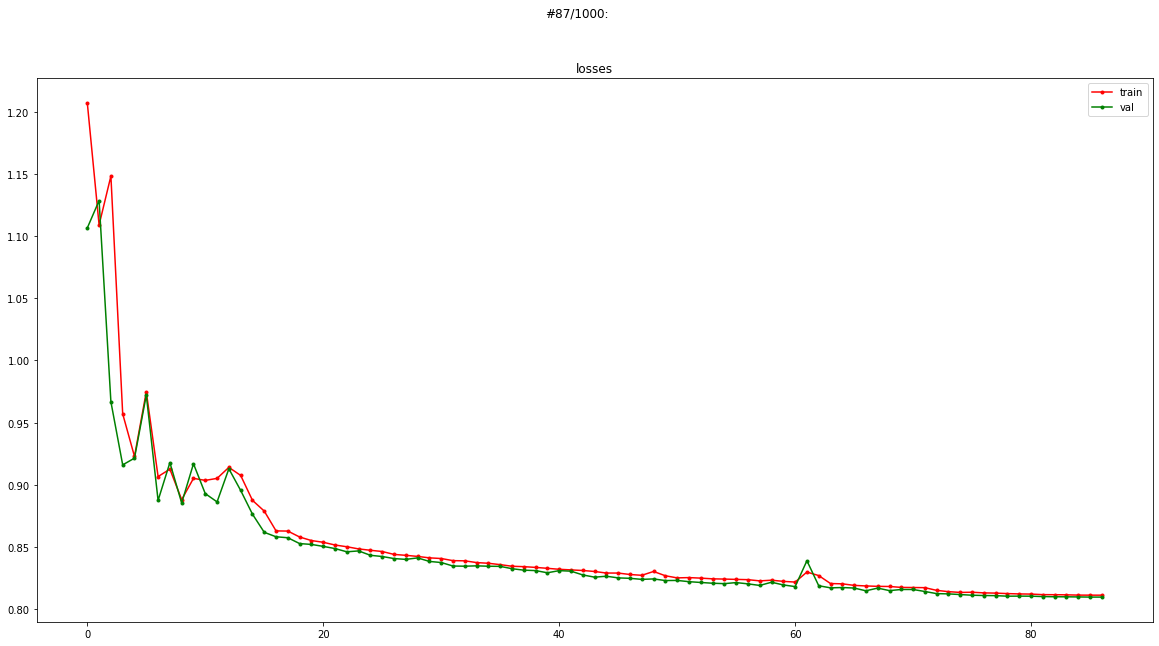

Learning process ended with early stop after epoch 87
CPU times: user 7h 12min 40s, sys: 4min 9s, total: 7h 16min 50s
Wall time: 7h 13min 49s


In [155]:
#!g1.1
%%time

model_type = "bi-rnn"

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

model_params[model_type] = {
    "vocab_size": hashing_trick_size,
    "input_size": 100,
    "hidden_size": 20,
    "output_size": num_classes[chosen_dataset],
    "rnn_type": nn.RNN,
    "num_layers": 2,
    "bidirectional": True,
    "dropout_p": 0.3,
    "reduce": "mean",
}

model[model_type], optimizer[model_type] = create_model_and_optimizer(
    model_class=RecurrentModel,
    model_params=model_params[model_type],
    lr=5e-4,
    device=device,
)

scheduler[model_type] = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer[model_type],
    mode="min",
    factor=0.25,
    patience=4,
    threshold=0.001,
    verbose=True,
)

criterion[model_type] = nn.NLLLoss()

model[model_type], optimizer[model_type], losses[model_type] = learning_loop(
    model=model[model_type],
    optimizer=optimizer[model_type],
    train_loader=dataloaders_pad["train"][chosen_dataset],
    val_loader=dataloaders_pad["train"][chosen_dataset],
    criterion=criterion[model_type],
    scheduler=scheduler[model_type],
    epochs=1000,
    min_lr=2e-6,
)

# if device != 'cpu':
#     model[model_type] = model[model_type].to('cpu')

## 4. Эмбеддинги

### 4.1 Word2Vec

Идея алгоритма простая: обучим не рекуррентную нейросеть на нахождение связи между словом и контекстом, в котором оно встречается в корпусе.

Все тексты токенезируются, затем берётся окно фиксированного размера и для кажджого текста проводят обучение на каждой из возможных позиций центра и окна. Далее, внутреннее представление модели для данного слова в центре - и есть его эмбеддинг.

Есть два алгоритма, относящиеся к Word2Vec:

1. **CBow** (Continuous Bag of Words) - предсказания слова по контексту

<img src="https://amitness.com/images/nlp-ssl-center-word-prediction.gif" alt="CBow" width="90%"/>


2. **Skip-gram** - предсказание контекста по слову

<img src="https://amitness.com/images/nlp-ssl-neighbor-word-prediction.gif" alt="Skip-gram" width="90%"/>

<img src="https://img-blog.csdnimg.cn/20190903155003926.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2NoZW54aW52aGFpODk=,size_16,color_FFFFFF,t_70" alt="word2vec" width="95%"/>

**Плюсы:**
- Похожие по контексту слова оказываются похожди в пространстве эмбеддингов
- Смысловые зависимости между словами сохраняются при математических операциях
<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/d61/30b/d45/d6130bd4502710631a8c812923230f47.png" alt="word2vec" width="80%"/>
<img src="https://amitness.com/images/word2vec-analogy.gif" alt="word2vec" width="80%"/>
<img src="https://habrastorage.org/r/w1560/getpro/habr/post_images/a19/84b/fea/a1984bfeab5a597c6fb6300f7d694901.png" alt="word2vec" width="80%"/>

**Минусы:**
- Плохо справляется со словами вне словаря. К примеру, если в текстах корпуса встречались достаточно часто слова 'tensor' и 'flow', но не встречался 'tensorflow', то модель пометит последний как просто '\<unk\>'
- Никак не переиспользует параметры для слов с общими корнями (к пр. 'eat', 'eats', 'eaten', 'eater', 'eating') - для модели это просто разные слова и каждое из них учится отдельно из контекста, тогда как слова сильно завязаны по смыслу.

### 4.2 GloVe

**GloVe** (Global vectors) - нечто среднее между word2vec и SVD разложением.

Модель GloVe пытается решить проблему эффективного использования статистики совпадений. GloVe минимизирует разницу между произведением векторов слов и логарифмом вероятности их совместного появления с помощью SGD.

### 4.3 FastText

Идея алгоритма следующая: будем обучать word2vec, но не над словами, а над буквенными n-gram-ами

Берём каждое слово, добавляем к нему <...>, чтобы обозначать границы слова.

Дальше бьём каждое слово на n-gram-мы фиксированного размера.

<table>
<thead>
<tr><th>Слово</th><th>n-gram</th><th>Разбиение</th></tr>
</thead>
<tbody>
<tr><td>eating</td><td>3</td><td>&lt;ea, eat, ati, tin, ing, ng&gt;</td></tr>
<tr><td>eating</td><td>4</td><td>&lt;eat, eati, atin, ting, ing&gt;</td></tr>
<tr><td>eating</td><td>5</td><td>&lt;eati, eatin, ating, ting&gt;</td></tr>
<tr><td>eating</td><td>6</td><td>&lt;eatin, eating, ating&gt;</td></tr>
</tbody>
<\table>

Токенизируем (так же используем hashing trick, чтобы ограничить размер словаря).

<img src="https://amitness.com/images/fasttext-hashing-ngrams.png" alt="hashing_trick" width="80%"/>

Используем суммы всех эмбедингов токенов и слова целиком, чтобы получить эмбеддинг слова.

<img src="https://amitness.com/images/fasttext-center-word-embedding.png" alt="word embeddings" width="80%"/>

Обучаем на положительных и негативных примерах - негативные сэмплим случайно с вероятностью пропорциональной корню из вероятности слова. Для каждого положительного сэмплим 5 негативных.

<img src="https://amitness.com/images/fasttext-negative-sampling-goal.png" alt="negative sampling" width="80%"/>

Обучаем при помощи SGD

### 4.4 ELMo

**ELMo** (Embeddings from Language Model)

Вместо того, чтобы использовать фиксированные эмбеддинги слов, ELMo смотрит на целое предложение, прежде чем присвоить каждому слову его эмбеддинг. Она использует двунаправленную модель долгой краткосрочной памяти (bi-directional LSTM), обученную специально под задачу создания таких эмбеддингов.

### 4.5 And then you'll need attention

ELMo - первый подход к лингивтическому моделированию

Далее появляются архитектуры с механизмом внимания, но это уже совсем другая история...

(to be continued на курсе NLP)